In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the data, split between train and test sets
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()

In [ ]:
#Splitting test set into test and validation of 5000 samples each
x_val = x_test[5000:10000]
x_test = x_test[0:5000]

In [ ]:
#normalizing train, validation, and test
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32') / 255

In [ ]:
#Building the CAE
#encoder
encoder_input = keras.Input(shape=(32, 32, 3), name='img')
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
encoder_output = MaxPooling2D((2, 2), padding='same')(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_output)
x = UpSampling2D((2, 2))(x)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoder_output = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='cae')
autoencoder.summary()

In [ ]:
#compile and train the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
cae_fit = autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=100,
                shuffle=True,
                validation_data=(x_val, x_val),
                callbacks=[early_stop])

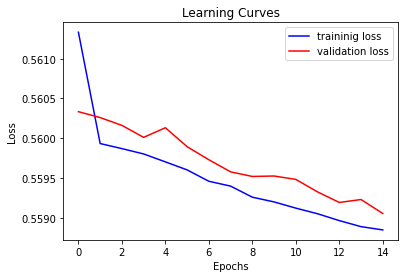

In [ ]:
#plot learning curve
import pandas as pd
import matplotlib.pyplot as plt

model_df = pd.DataFrame(cae_fit.history)
model_df['epoch'] = cae_fit.epoch
fig = plt.Figure(figsize=(4, 3))

epochs_to_mean = 1

plt.figure(figsize=(6, 4))
plt.plot(model_df['loss'].rolling(epochs_to_mean).mean(), 'b')
plt.plot(model_df['val_loss'].rolling(epochs_to_mean).mean(), '-r')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['traininig loss', 'validation loss'])

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
bce = keras.losses.BinaryCrossentropy()
bce(x_test, decoded_imgs).numpy()

0.5595714

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Building a CAE with 13 layers and more filters
#encoder
encoder_input = keras.Input(shape=(32, 32, 3), name='img')
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoder_output = MaxPooling2D((2, 2), padding='same')(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_output)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoder_output = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='cae')
autoencoder.summary()

In [ ]:
#compile and train the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
cae_fit = autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=200,
                shuffle=True,
                validation_data=(x_val, x_val),
                callbacks=[early_stop])

Epoch 1/15
250/250 [==============================] - 99s 398ms/step - loss: 0.6054 - val_loss: 0.5866
Epoch 2/15
250/250 [==============================] - 102s 410ms/step - loss: 0.5833 - val_loss: 0.5801
Epoch 3/15
250/250 [==============================] - 102s 408ms/step - loss: 0.5787 - val_loss: 0.5771
Epoch 4/15
250/250 [==============================] - 104s 417ms/step - loss: 0.5765 - val_loss: 0.5768
Epoch 5/15
250/250 [==============================] - 101s 406ms/step - loss: 0.5751 - val_loss: 0.5746
Epoch 6/15
250/250 [==============================] - 102s 409ms/step - loss: 0.5740 - val_loss: 0.5735
Epoch 7/15
250/250 [==============================] - 101s 406ms/step - loss: 0.5732 - val_loss: 0.5725
Epoch 8/15
250/250 [==============================] - 101s 405ms/step - loss: 0.5725 - val_loss: 0.5739
Epoch 9/15
250/250 [==============================] - 104s 415ms/step - loss: 0.5717 - val_loss: 0.5716
Epoch 10/15
250/250 [==============================] - 104s 414ms

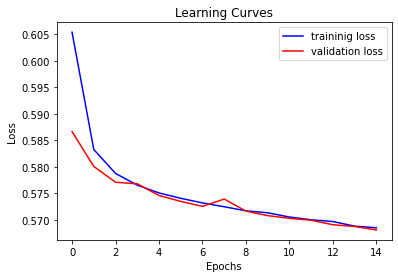

In [ ]:
#plot learning curve
import pandas as pd
import matplotlib.pyplot as plt

model_df = pd.DataFrame(cae_fit.history)
model_df['epoch'] = cae_fit.epoch
fig = plt.Figure(figsize=(4, 3))

epochs_to_mean = 1

plt.figure(figsize=(6, 4))
plt.plot(model_df['loss'].rolling(epochs_to_mean).mean(), 'b')
plt.plot(model_df['val_loss'].rolling(epochs_to_mean).mean(), '-r')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['traininig loss', 'validation loss'])

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
bce = keras.losses.BinaryCrossentropy()
bce(x_test, decoded_imgs).numpy()

0.5692308

In [ ]:
#Best performing CAE
#encoder
encoder_input = keras.Input(shape=(32, 32, 3), name='img')
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
encoder_output = MaxPooling2D((2, 2), padding='same')(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_output)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoder_output = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='cae')
autoencoder.summary()

In [ ]:
#compile and train the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
cae_fit = autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=100,
                shuffle=True,
                validation_data=(x_val, x_val),
                callbacks=[early_stop])

Epoch 1/15
500/500 [==============================] - 4s 8ms/step - loss: 0.5719 - val_loss: 0.5656
Epoch 2/15
500/500 [==============================] - 4s 8ms/step - loss: 0.5613 - val_loss: 0.5597
Epoch 3/15
500/500 [==============================] - 4s 8ms/step - loss: 0.5595 - val_loss: 0.5601
Epoch 4/15
500/500 [==============================] - 4s 8ms/step - loss: 0.5583 - val_loss: 0.5575
Epoch 5/15
500/500 [==============================] - 4s 8ms/step - loss: 0.5571 - val_loss: 0.5567
Epoch 6/15
500/500 [==============================] - 4s 8ms/step - loss: 0.5565 - val_loss: 0.5564
Epoch 7/15
500/500 [==============================] - 4s 8ms/step - loss: 0.5559 - val_loss: 0.5554
Epoch 8/15
500/500 [==============================] - 4s 8ms/step - loss: 0.5557 - val_loss: 0.5553
Epoch 9/15
500/500 [==============================] - 4s 8ms/step - loss: 0.5551 - val_loss: 0.5560
Epoch 10/15
500/500 [==============================] - 4s 8ms/step - loss: 0.5549 - val_loss: 0.5548

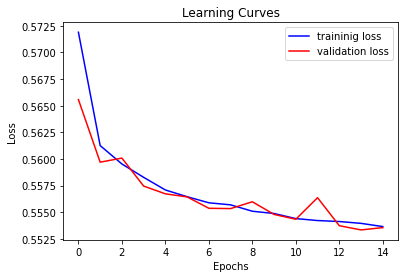

In [ ]:
#plot learning curve
model_df = pd.DataFrame(cae_fit.history)
model_df['epoch'] = cae_fit.epoch
fig = plt.Figure(figsize=(4, 3))

epochs_to_mean = 1

plt.figure(figsize=(6, 4))
plt.plot(model_df['loss'].rolling(epochs_to_mean).mean(), 'b')
plt.plot(model_df['val_loss'].rolling(epochs_to_mean).mean(), '-r')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['traininig loss', 'validation loss'])

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
bce = keras.losses.BinaryCrossentropy()
bce(x_test, decoded_imgs).numpy()

0.55438167

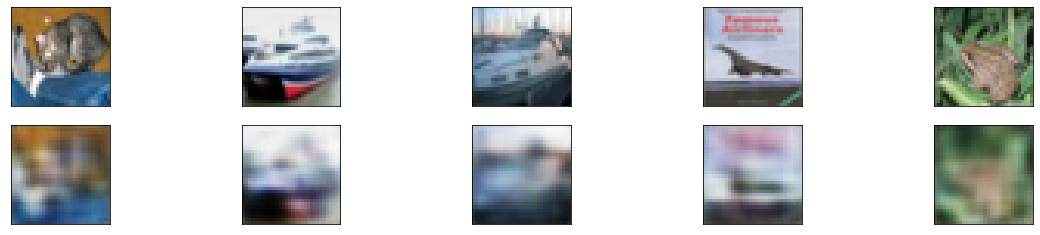

In [ ]:
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#Colorization
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from skimage.color import rgb2lab,lab2rgb

# Load the data, split between train and test sets
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()

#normalizing train, validation, and test
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
#function to test range of RGB and LAB values
def plotMinMax(Xsub_rgb,labels=["R","G","B"]):
    print("______________________________")
    for i, lab in enumerate(labels):
        mi = np.min(Xsub_rgb[:,:,:,i])
        ma = np.max(Xsub_rgb[:,:,:,i])
        print("{} : MIN={:8.4f}, MAX={:8.4f}".format(lab,mi,ma))

plotMinMax(rgb2lab(x_train), labels = ["L","A","B"])

In [ ]:
#Select only grayscale layer for input
x_train_gs = rgb2lab(x_train)[:,:,:,0]
x_train_gs = np.reshape(x_train_gs, (len(x_train_gs),32,32,1))

#train with A and B layers
x_train_ab = rgb2lab(x_train)[:,:,:,1:]
x_train_ab = x_train_ab/128

In [ ]:
#Best CAE
#encoder
encoder_input = keras.Input(shape=(32, 32, 1), name='img')
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
encoder_output = MaxPooling2D((2, 2), padding='same')(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

#decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_output)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='cae')

#compile
autoencoder.compile(optimizer='adam', loss='mse')
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
#fit the best performing autoencoder from previous exercise
cae_fit = autoencoder.fit(x_train_gs, x_train_gs,
                epochs=15,
                batch_size=100,
                shuffle=True,
                validation_data=(x_train_ab, x_train_ab),
                callbacks=[early_stop])

In [ ]:
#build autoencoder without max pooling layers
#Design the neural network
model = Sequential()
model.add(InputLayer(input_shape=(32, 32, 1)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [ ]:
#compile and fit
model.compile(optimizer='adam', loss = 'mse')
model.fit(x=x_train_gs, y=x_train_ab, batch_size=100, epochs=15)

In [ ]:
#Use greyscale layer of the test dataset to predict color scale
x_test_gs = rgb2lab(x_test)[:,:,:,0]
x_test_gs = np.reshape(x_test_gs, (len(x_test_gs),32,32,1))

#predict output
output = model.predict(x_test_gs)
output = output*128

In [ ]:
#Check output
x_test_rgb = np.zeros([5,32,32,3])
for i in range(0,5):
        cur = np.zeros((32, 32, 3))
        cur[:,:,0] = x_test_gs[i][:,:,0]
        cur[:,:,1:] = output[i]
        x_test_rgb[i] = lab2rgb(cur)

n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(x_test_rgb[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()